<a href="https://colab.research.google.com/github/felicityogoke/HealthCare-Sentiment-Analysis/blob/main/Research_Questions_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

No GPU, using /device:CPU:0.


In [ ]:
# Load Tweet dataset# Load dataset file into a Pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/webmd.csv")
# Output first five rows
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [ ]:
print(df.head(2))

          Age      Condition       Date          Drug  DrugId  EaseofUse  \
0  75 or over    Stuffy Nose  9/21/2014  25dph-7.5peh  146724          5   
1       25-34  Cold Symptoms  1/13/2011  25dph-7.5peh  146724          5   

   Effectiveness                                            Reviews  \
0              5  I'm a retired physician and of all the meds I ...   
1              5  cleared me right up even with my throat hurtin...   

   Satisfaction     Sex                                              Sides  \
0             5    Male  Drowsiness,  dizziness ,  dry mouth /nose/thro...   
1             5  Female  Drowsiness,  dizziness ,  dry mouth /nose/thro...   

   UsefulCount sentiment  
0            0  Positive  
1            1  Positive  


In [ ]:
# Define the columns to check for rating
cols_to_check = ['Satisfaction', 'Effectiveness', 'EaseofUse']

# Define the ratings to drop
ratings_to_drop = [6, 10]

# Drop the rows where any of the columns have a rating of 6 or 10
df = df[~df[cols_to_check].isin(ratings_to_drop).any(axis=1)]

In [ ]:
# Map the numerical ratings to corresponding labels
label_map = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
df['sentiment'] = df['Satisfaction'].map(label_map)
df = df.dropna()

In [ ]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,sentiment
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,Positive
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,Positive
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,Neutral
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,Negative
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,Negative


##1. overall sentiment of patient reviews towards certain healthcare products.

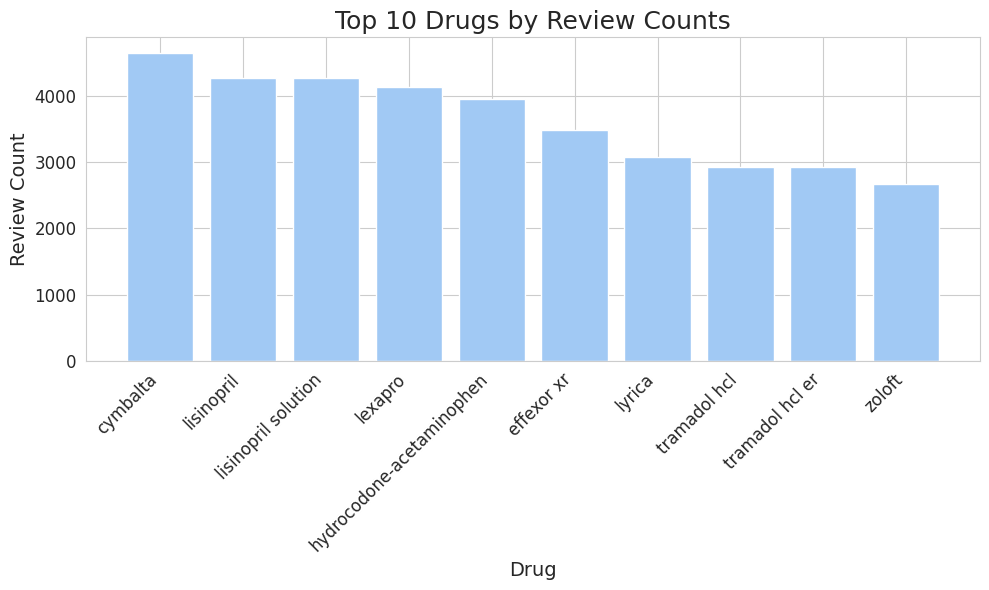

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette and style
sns.set_palette("pastel")
sns.set_style("whitegrid")

# Create a dictionary of drug counts
drug_counts = df['Drug'].value_counts().to_dict()

# Get the top 10 drugs and their counts
top_drugs = dict(list(drug_counts.items())[:10])

# Create a bar plot of drug counts
plt.figure(figsize=(10, 6))
plt.bar(top_drugs.keys(), top_drugs.values())
plt.title('Top 10 Drugs by Review Counts', fontsize=18)
plt.xlabel('Drug', fontsize=14)
plt.ylabel('Review Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#print the number of null values in each column
df.isnull().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
sentiment        0
dtype: int64

In [ ]:
# Assume `df` is the pandas dataframe containing the reviews and sentiment classes

# Filter the dataframe to only include reviews for a specific drug
drug_name = 'cymbalta'
drug_reviews = df[df['Drug'] == drug_name]

sentiment_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
drug_reviews['sentiment'] = drug_reviews['sentiment'].map(sentiment_map)

# Calculate the average sentiment score for the drug
avg_sentiment = drug_reviews['sentiment'].mean()
print(avg_sentiment)

1.0512048192771084


<ipython-input-10-e4424c35b859>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_reviews['sentiment'] = drug_reviews['sentiment'].map(sentiment_map)


In [ ]:
# Create a dictionary of drug counts
drug_counts = df['Drug'].value_counts().to_dict()

# Get the top 10 drugs
top_drugs = list(drug_counts.keys())[:10]

# Create a dictionary to store the average sentiment for each drug
avg_sentiments = {}

# Loop through the top 10 drugs and calculate the average sentiment for each
for drug in top_drugs:
    drug_reviews = df[df['Drug'] == drug]
    sentiment_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
    drug_reviews.loc[:, 'sentiment'] = drug_reviews['sentiment'].map(sentiment_map)
    avg_sentiment = drug_reviews['sentiment'].mean()
    avg_sentiments[drug] = avg_sentiment

# Print the average sentiment for each drug
for drug, avg_sentiment in avg_sentiments.items():
    print(drug, ':', avg_sentiment)


In [ ]:
drug_reviews['sentiment']

169588    2
169603    0
169612    0
169621    2
169630    0
         ..
173845    2
173846    2
173847    2
173848    1
173849    0
Name: sentiment, Length: 2662, dtype: int64

In [ ]:
import pandas as pd



# Group the DataFrame by 'drug' and count the number of reviews for each drug
drug_reviews = df.groupby('Drug')['Reviews'].count()

# Select the top 5 drugs with the most reviews
top_drugs = drug_reviews.nlargest(5).index.tolist()

# Filter the DataFrame to only include reviews for the top 5 drugs
df_top = df[df['Drug'].isin(top_drugs)]

# Calculate the overall sentiment for each drug
drug_sentiment = df_top.groupby('Drug')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Calculate the total sentiment score for each drug
drug_sentiment['sentiment_score'] = drug_sentiment['Positive']*0.25 - drug_sentiment['Negative']*0.5 + drug_sentiment['Neutral']*0.25

# Create a new column 'overall_sentiment'
drug_sentiment['overall_sentiment'] = ''

# Assign an overall sentiment based on the sentiment score
drug_sentiment.loc[drug_sentiment['sentiment_score'] > 0, 'overall_sentiment'] = 'Positive'
drug_sentiment.loc[drug_sentiment['sentiment_score'] < 0, 'overall_sentiment'] = 'Negative'
drug_sentiment.loc[drug_sentiment['sentiment_score'] == 0, 'overall_sentiment'] = 'Neutral'

# The resulting DataFrame 'drug_sentiment' will have the sentiment score for each of the top 5 drugs.


In [ ]:
drug_sentiment.head()

sentiment,Negative,Neutral,Positive,sentiment_score,overall_sentiment
Drug,,,,,
cymbalta,0.404905,0.138985,0.456110,-0.053679,Negative
hydrocodone-acetaminophen,0.220391,0.200355,0.579254,0.084707,Positive
lexapro,0.265360,0.150701,0.583938,0.050980,Positive
lisinopril,0.475510,0.168737,0.355753,-0.106632,Negative
lisinopril solution,0.475510,0.168737,0.355753,-0.106632,Negative


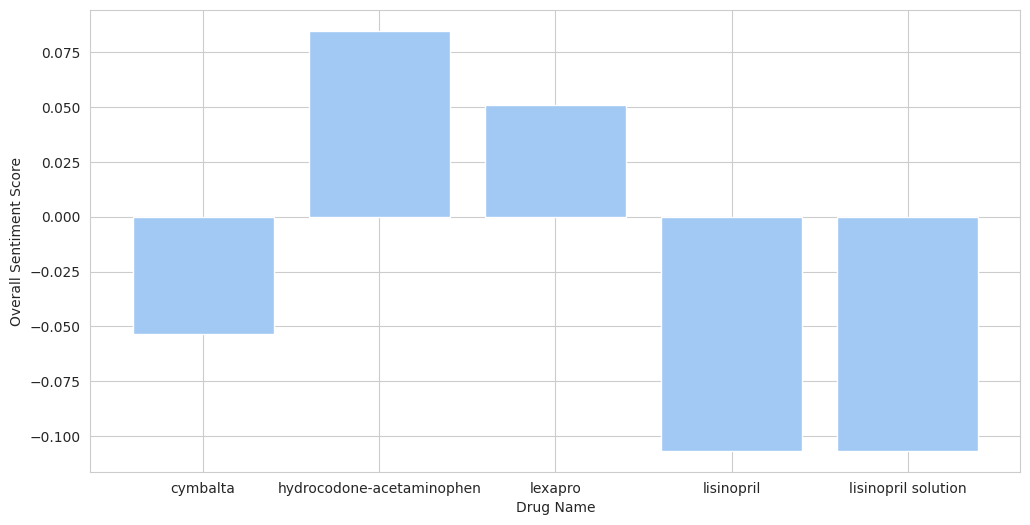

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(drug_sentiment.index, drug_sentiment['sentiment_score'])

# Add labels and title
plt.xlabel('Drug Name')
plt.ylabel('Overall Sentiment Score')


# Show the plot
plt.show()



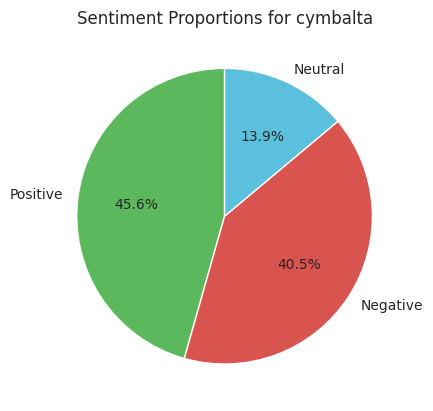

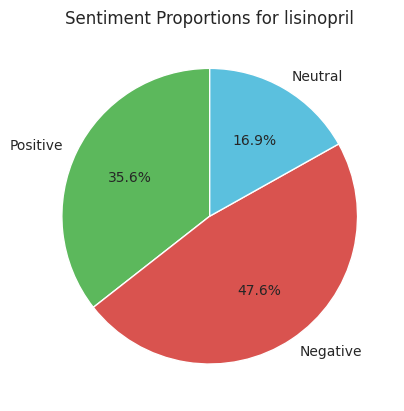

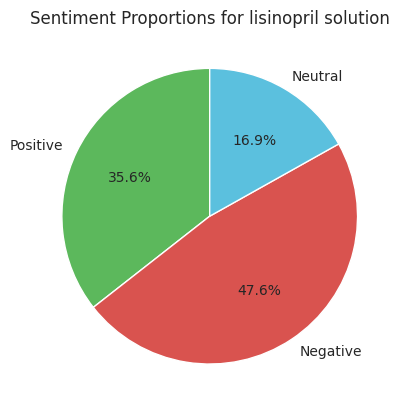

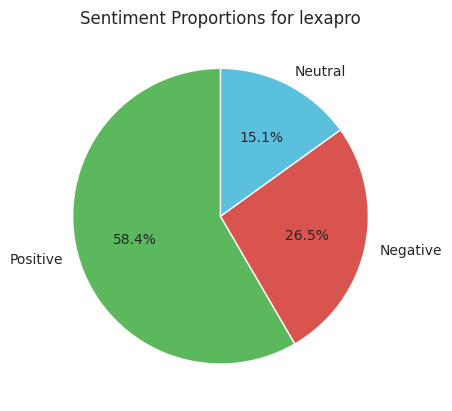

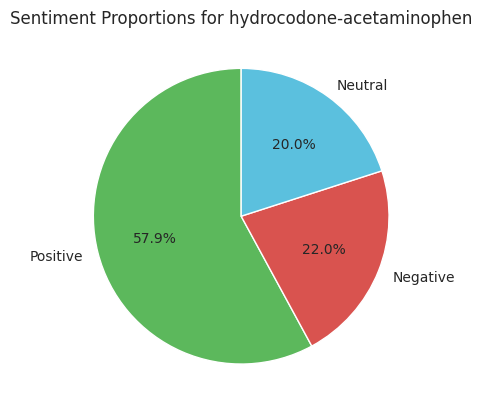

In [ ]:
import matplotlib.pyplot as plt

# Create a list of colors for each sentiment
colors = ['#5cb85c', '#d9534f', '#5bc0de']

# Loop through each of the top 5 drugs and create a pie chart for each one
for drug in top_drugs:
    # Extract the sentiment proportions for the current drug
    proportions = drug_sentiment.loc[drug, ['Positive', 'Negative', 'Neutral']].values
    # Create a list of labels for each sentiment
    labels = ['Positive', 'Negative', 'Neutral']
    # Create a pie chart with the current drug's sentiment proportions and labels
    plt.pie(proportions, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    # Add a title to the pie chart
    plt.title(f"Sentiment Proportions for {drug}")
    # Show the pie chart
    plt.show()


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


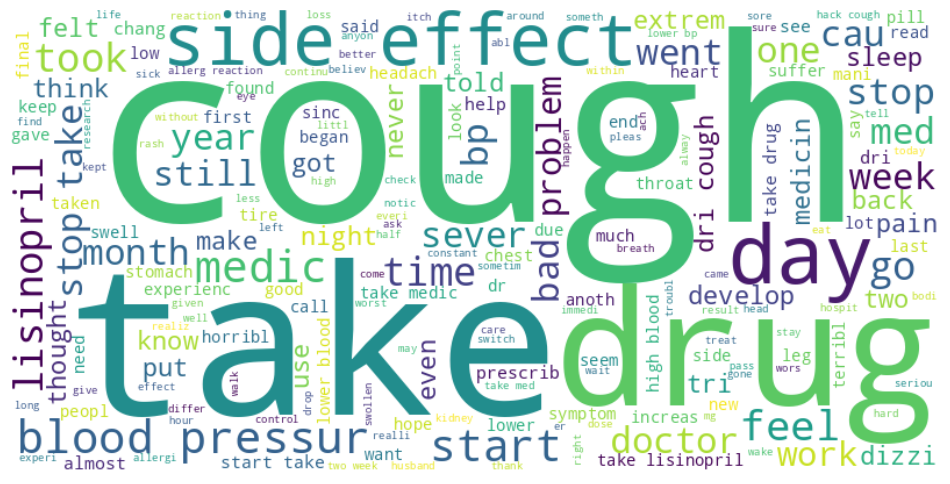

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
#df = pd.read_csv("/content/drive/MyDrive/webmd.csv")

# Filter the dataset to include only the reviews with drug name "lisinopril" and satisfaction of 1
lisinopril_reviews = df[(df['Drug'].str.contains('lisinopril')) & (df['Satisfaction'] == 1)]['Reviews']

# Convert the reviews to string type
lisinopril_reviews = lisinopril_reviews.astype(str)

# Preprocess the text
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
ps = PorterStemmer()
lisinopril_reviews = lisinopril_reviews.apply(lambda x: ' '.join([ps.stem(word.lower()) for word in x.split() if word.lower() not in stopwords and word.isalpha()]))

# Join all the reviews into a single string
reviews_text = ' '.join(lisinopril_reviews)

# Create a word cloud of the drug names
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


##2. 2. What are the trends in patient sentiment towards a product over time?

In [ ]:
# Convert the 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# create a new dataframe with only the reviews,sentiment,date and drug columns
df = df.loc[:, ['Reviews', 'sentiment','Date','Drug']]

In [ ]:
df.head()

,Reviews,sentiment,Date,Drug
0,I'm a retired physician and of all the meds I ...,Positive,2014-09-01,25dph-7.5peh
1,cleared me right up even with my throat hurtin...,Positive,2011-01-01,25dph-7.5peh
2,why did my PTINR go from a normal of 2.5 to ov...,Neutral,2012-07-01,warfarin (bulk) 100 % powder
3,FALLING AND DON'T REALISE IT,Negative,2010-09-01,warfarin (bulk) 100 % powder
4,My grandfather was prescribed this medication ...,Negative,2009-01-01,warfarin (bulk) 100 % powder


In [ ]:
df['Date'] = df['Date'].apply(lambda x: x.strftime('%Y'))



In [ ]:
# Group the DataFrame by 'drug' and count the number of reviews for each drug
drug_reviews = df.groupby('Drug')['Reviews'].count()

# Select the top 5 drugs with the most reviews
top_drugs = drug_reviews.nlargest(5).index.tolist()

# Filter the DataFrame to only include reviews for the top 5 drugs
df_top = df[df['Drug'].isin(top_drugs)]

# Filter the data to include only reviews from the past 5 years
df_top = df_top[df_top['Date'] >= '2007-01']

In [ ]:
df_top.head()

,Reviews,sentiment,Date,Drug
9197,No Script or health Insurance needed to place ...,Positive,2020,lisinopril solution
9203,I have developed a very itch rash on my body f...,Positive,2020,lisinopril solution
9209,"tried alternative medicine Beet root, hibiscus...",Positive,2020,lisinopril solution
9215,Have been taking 10 mg doses per day for over ...,Positive,2019,lisinopril solution
9221,I don't like that I'm taking this and not know...,Negative,2019,lisinopril solution


In [ ]:
# Group by drug and date
grouped = df_top.groupby(['Drug', 'Date', 'sentiment']).size().reset_index(name='count')


In [ ]:
grouped.head()

,Drug,Date,sentiment,count
0,cymbalta,2011,Negative,249
1,cymbalta,2011,Neutral,76
2,cymbalta,2011,Positive,216
3,cymbalta,2012,Negative,184
4,cymbalta,2012,Neutral,75


In [ ]:
# Pivot the data to create a table with counts of positive, negative, and neutral reviews for each drug on each date
pivot = grouped.pivot_table(index=['Drug', 'Date'], columns='sentiment', values='count', fill_value=0)

# Calculate the sentiment score for each drug on each date
pivot['sentiment_score'] = pivot['Positive'] - pivot['Negative']

# Calculate the total sentiment score for each drug
pivot['sentiment_score'] = pivot['Positive']*0.25 - pivot['Negative']*0.5 + pivot['Neutral']*0.25

# Create a new column 'overall_sentiment'
pivot['overall_sentiment'] = ''

# Assign an overall sentiment based on the sentiment score
pivot.loc[pivot['sentiment_score'] > 0, 'overall_sentiment'] = 'Positive'
pivot.loc[pivot['sentiment_score'] < 0, 'overall_sentiment'] = 'Negative'
pivot.loc[pivot['sentiment_score'] == 0, 'overall_sentiment'] = 'Neutral'

In [ ]:
pivot.loc['lisinopril']


sentiment,Negative,Neutral,Positive,sentiment_score,overall_sentiment
Date,,,,,
2011,233,82,172,-53.00,Negative
2012,187,58,125,-47.75,Negative
2013,151,48,121,-33.25,Negative
2014,115,31,77,-30.50,Negative
2015,43,11,17,-14.50,Negative
2016,38,6,17,-13.25,Negative
2017,24,8,9,-7.75,Negative
2018,28,4,2,-12.50,Negative
2019,14,0,9,-4.75,Negative


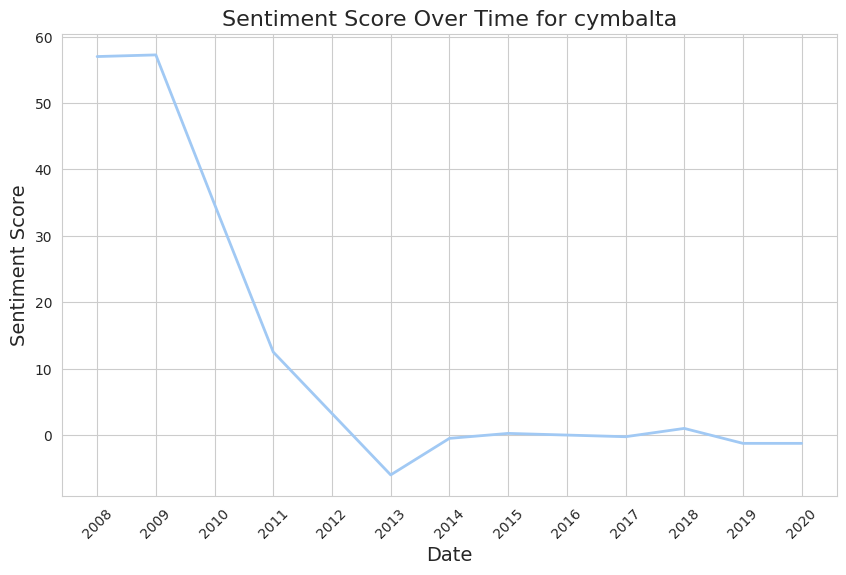

In [ ]:
# Select the data for a particular drug
drug_data = pivot.loc['lexapro']

# Plot the sentiment score over time
fig, ax = plt.subplots(figsize=(10, 6)) # Set the figure size
ax.plot(drug_data.index, drug_data['sentiment_score'], linewidth=2) # Set the line width
ax.set_xlabel('Date', fontsize=14) # Set the x-axis label and font size
ax.set_ylabel('Sentiment Score', fontsize=14) # Set the y-axis label and font size
ax.set_title('Sentiment Score Over Time for cymbalta', fontsize=16) # Set the title and font size
plt.xticks(rotation=45) # Rotate the x-axis labels
plt.show()


cymbalta
lisinopril
lisinopril solution
lexapro
hydrocodone-acetaminophen


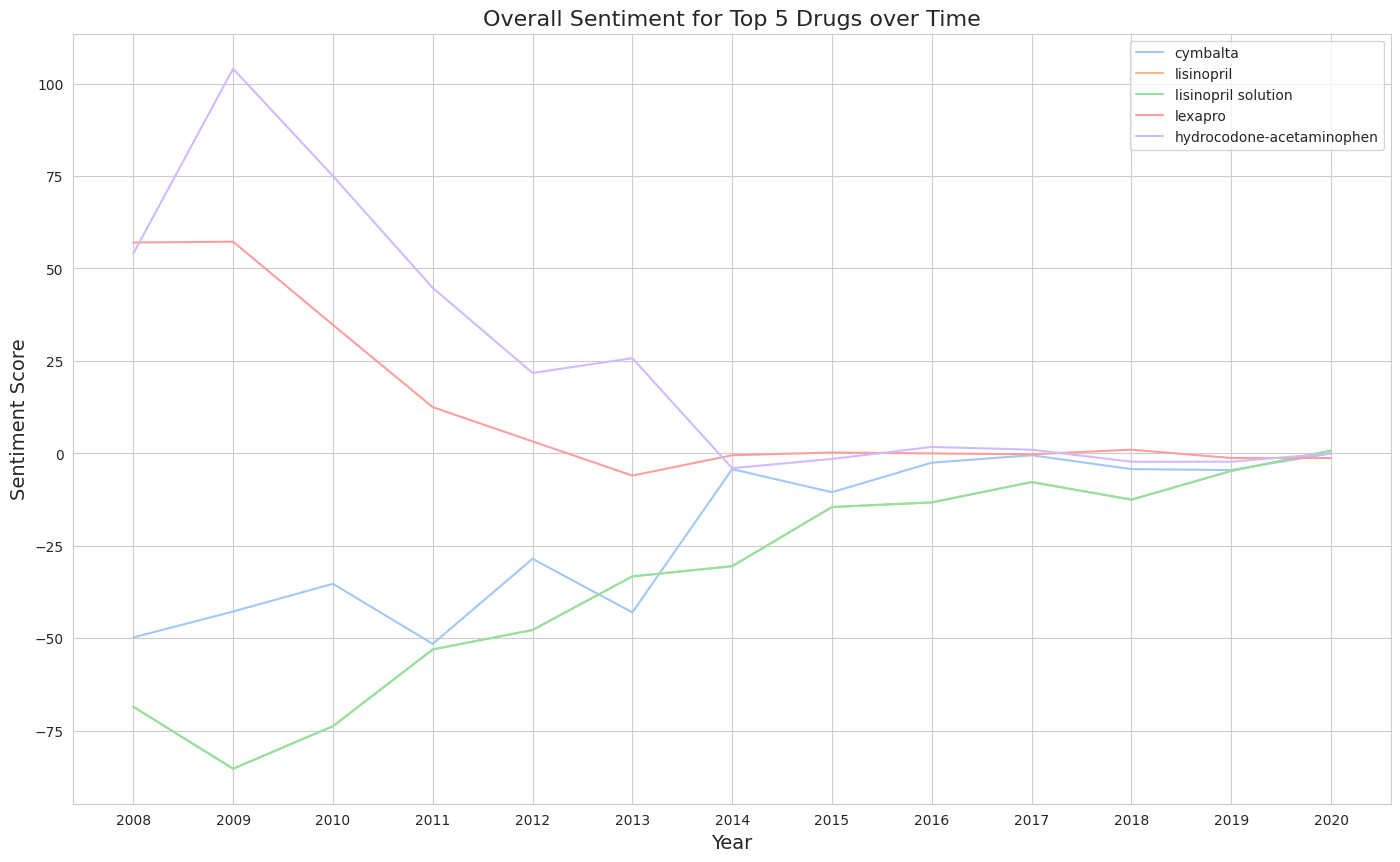

In [ ]:
fig, ax = plt.subplots(figsize=(17, 10)) # Set the figure size

for drug in top_drugs:
    pivot_drug = pivot.loc[drug]
    ax.plot(pivot_drug.index.get_level_values('Date'), pivot_drug['sentiment_score'], label=drug)
    print(drug)

# Add labels and title
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Sentiment Score', fontsize=14)
ax.set_title('Overall Sentiment for Top 5 Drugs over Time', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()



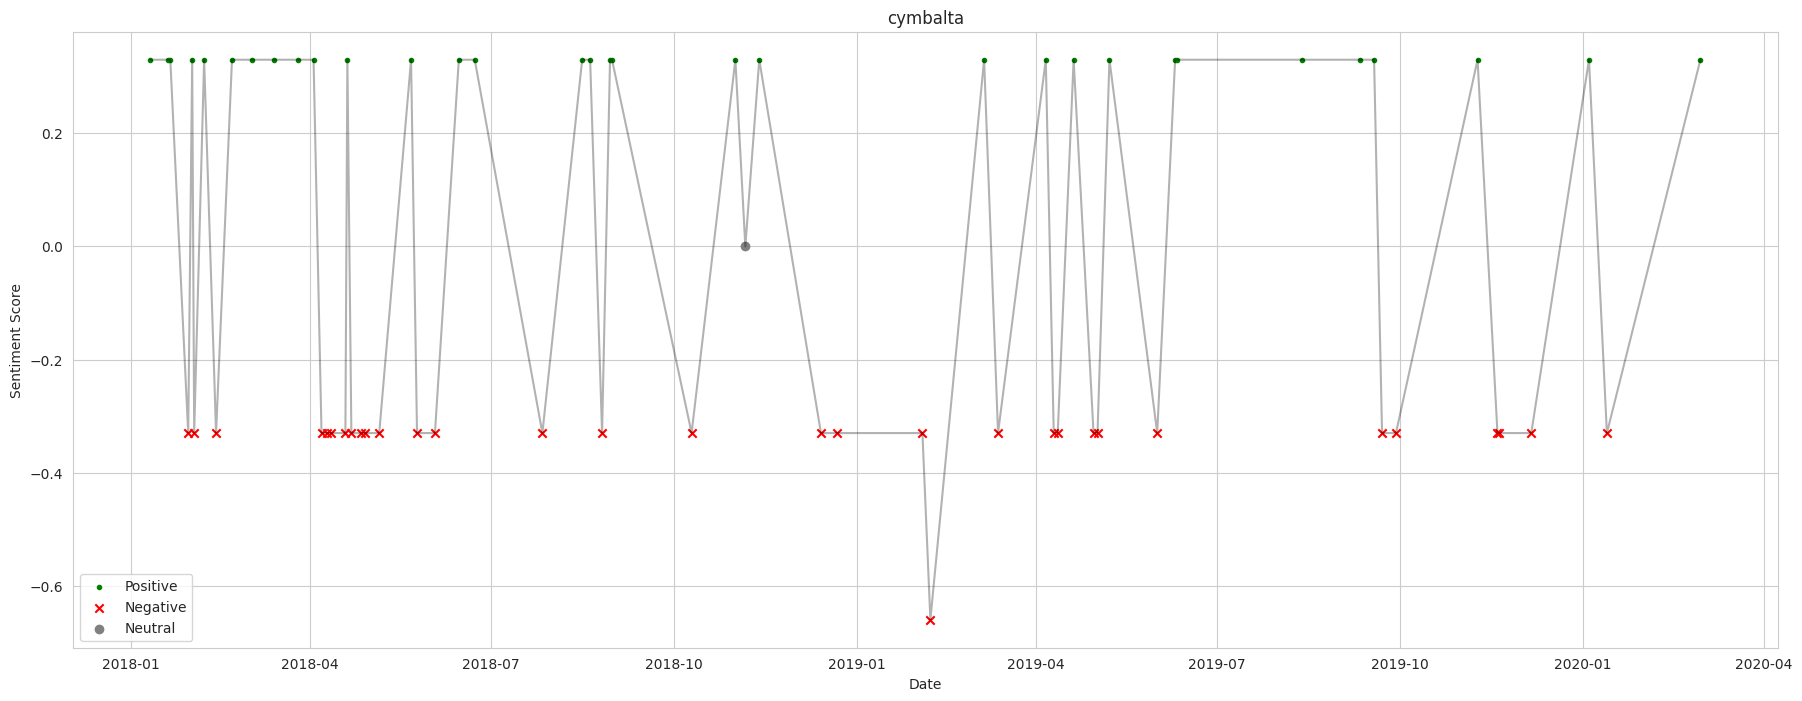

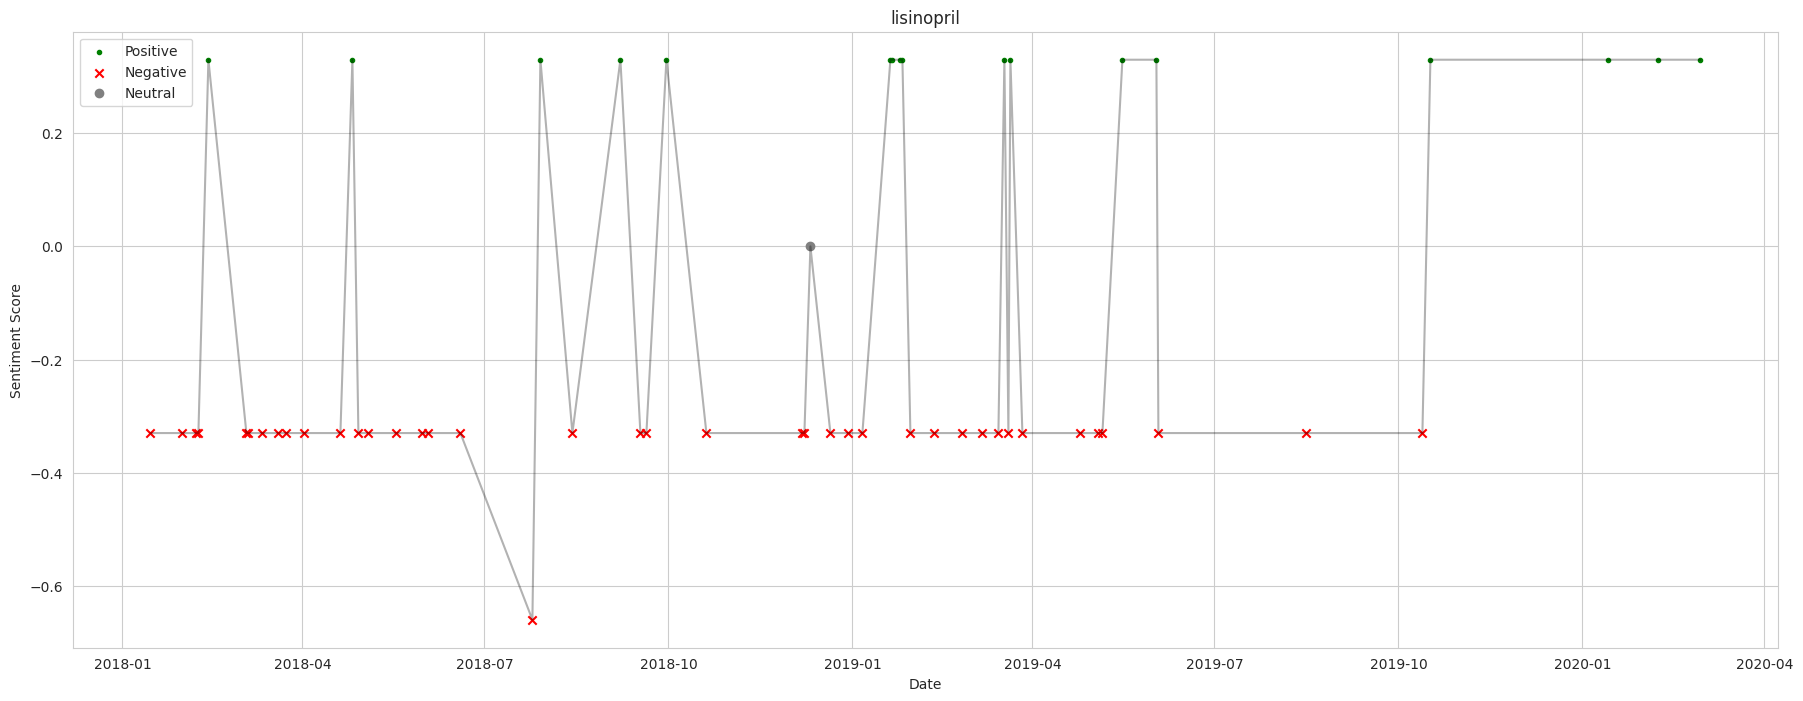

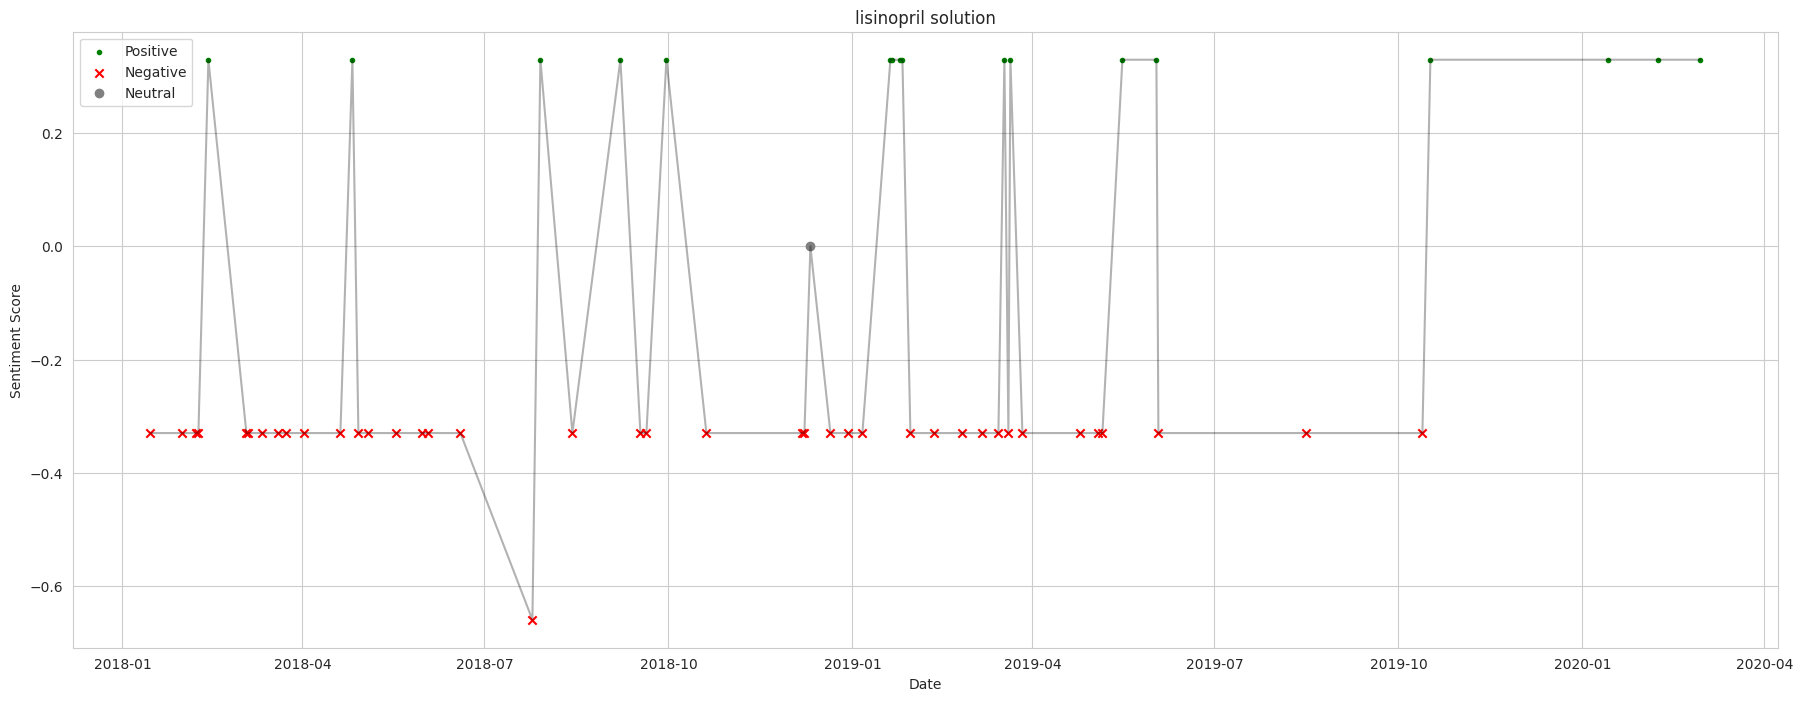

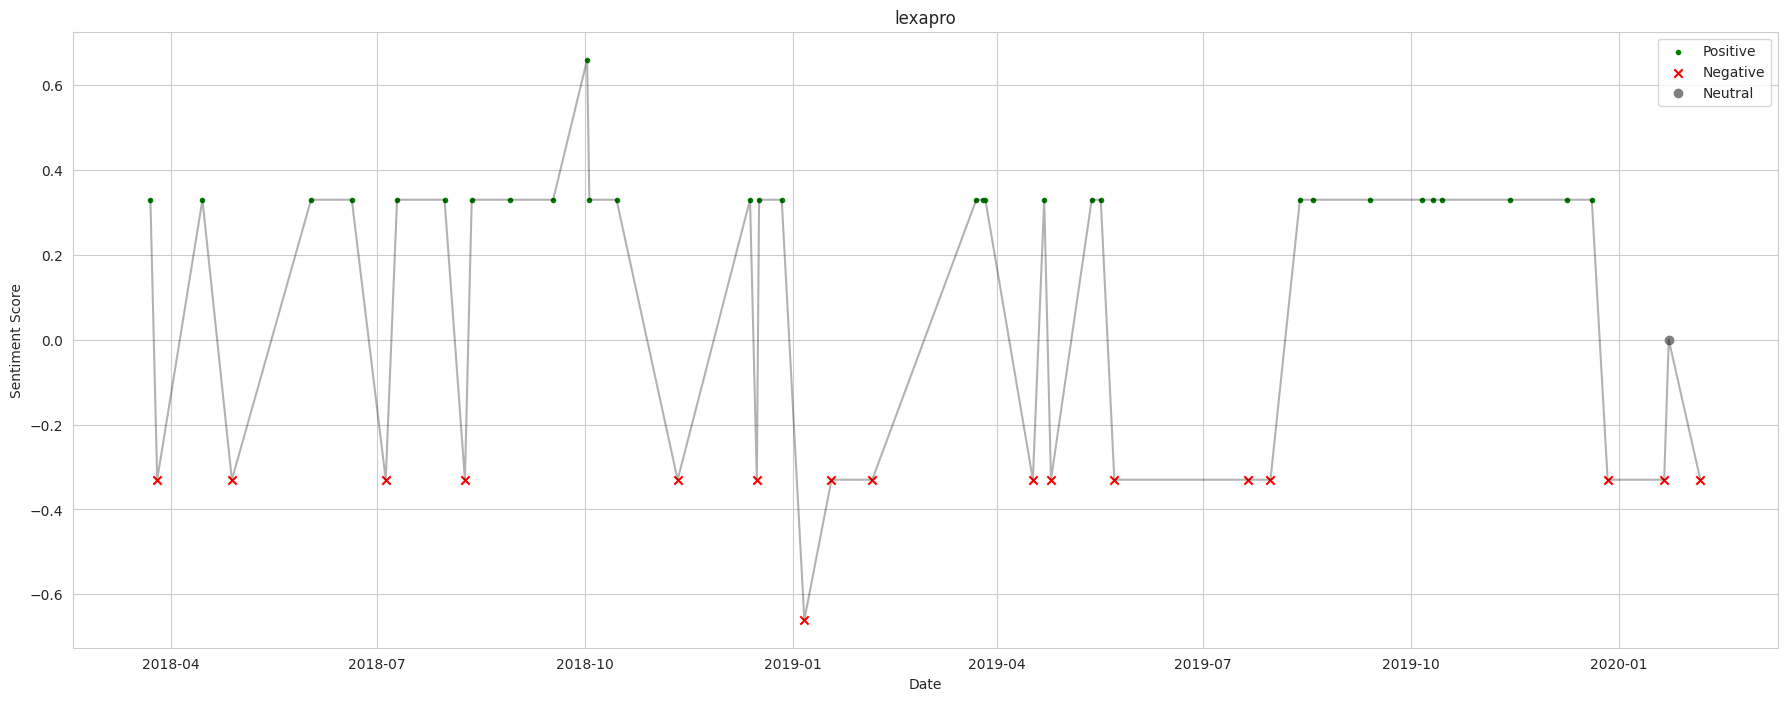

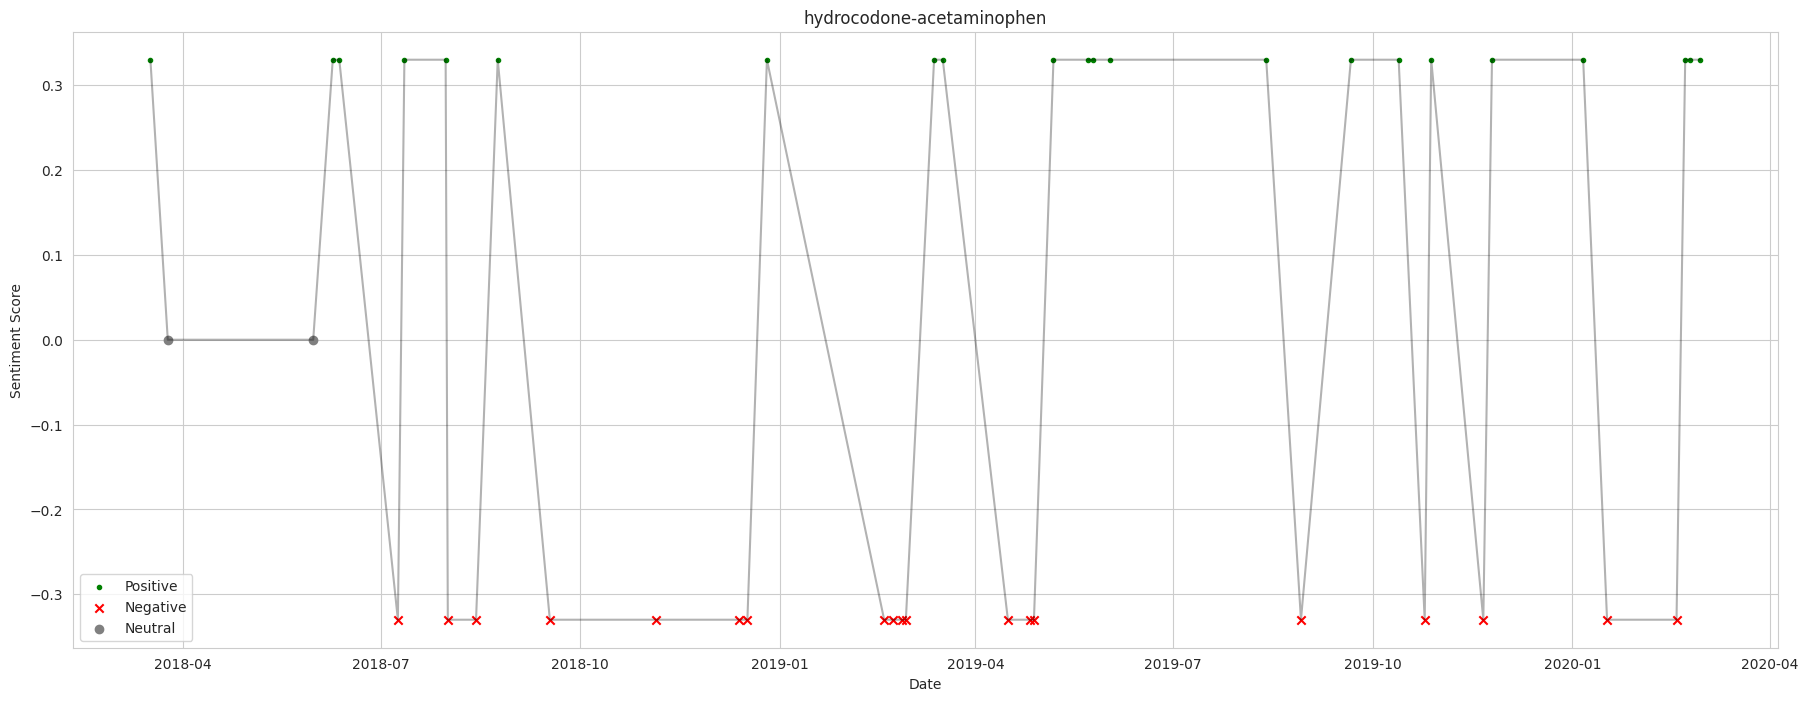

In [ ]:
import matplotlib.pyplot as plt

# Define the colors and markers for each sentiment
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
markers = {'Positive': '.', 'Negative': 'x', 'Neutral': 'o'}



# Create a line chart for each drug, highlighting the overall sentiment
for drug in top_drugs:
    df_drug = pivot.loc[drug]
    plt.figure(figsize=(22, 8))
    plt.plot(df_drug.index, df_drug['sentiment_score'], color='black', alpha=0.3)
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        mask = df_drug['overall_sentiment'] == sentiment
        plt.scatter(df_drug[mask].index, df_drug[mask]['sentiment_score'], 
                    color=colors[sentiment], marker=markers[sentiment], label=sentiment)
    plt.title(drug)
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.legend()
    plt.show()



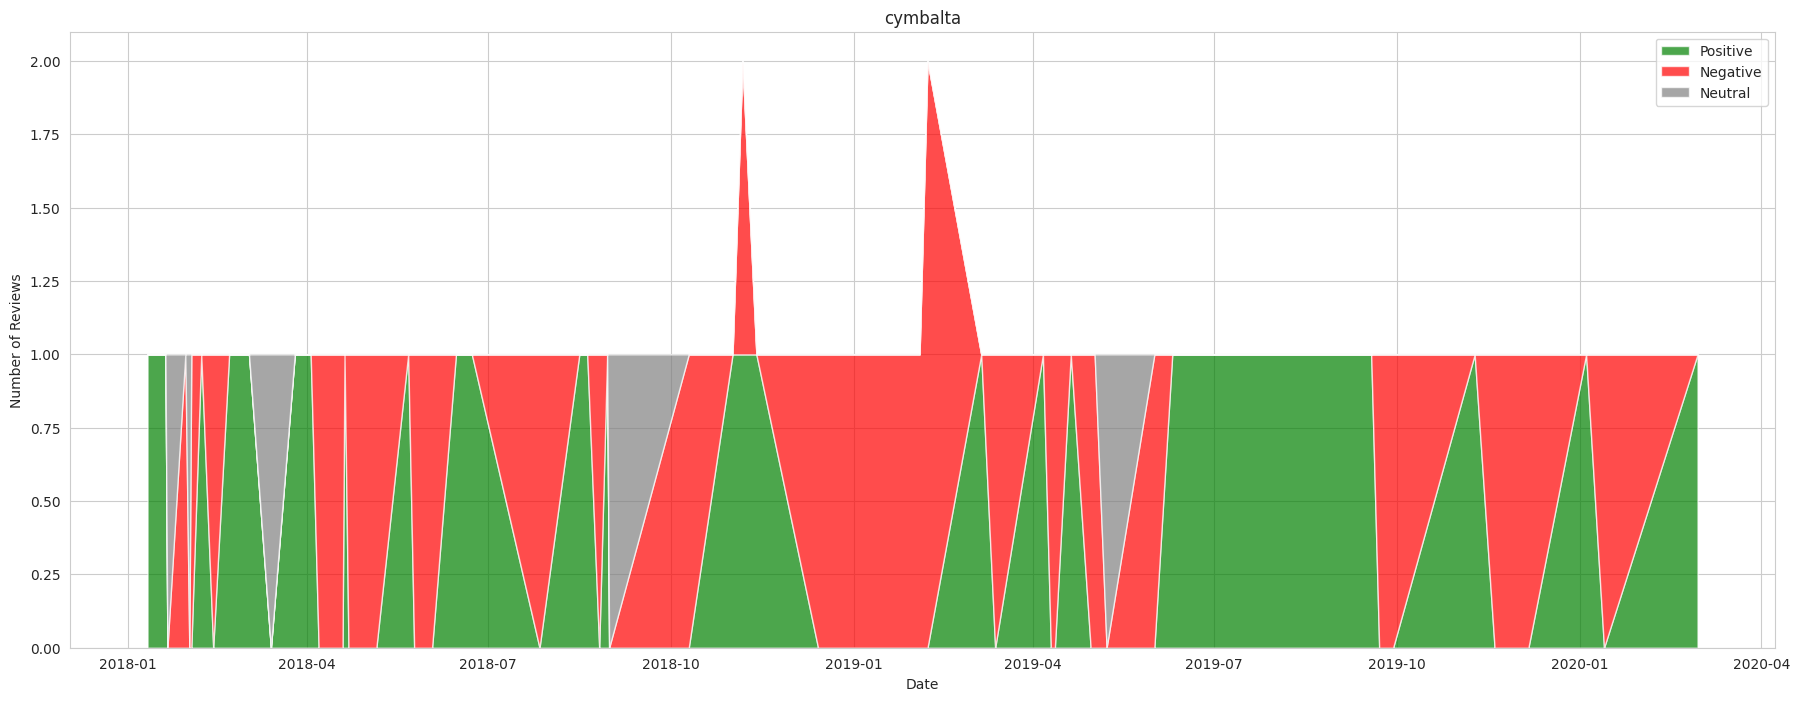

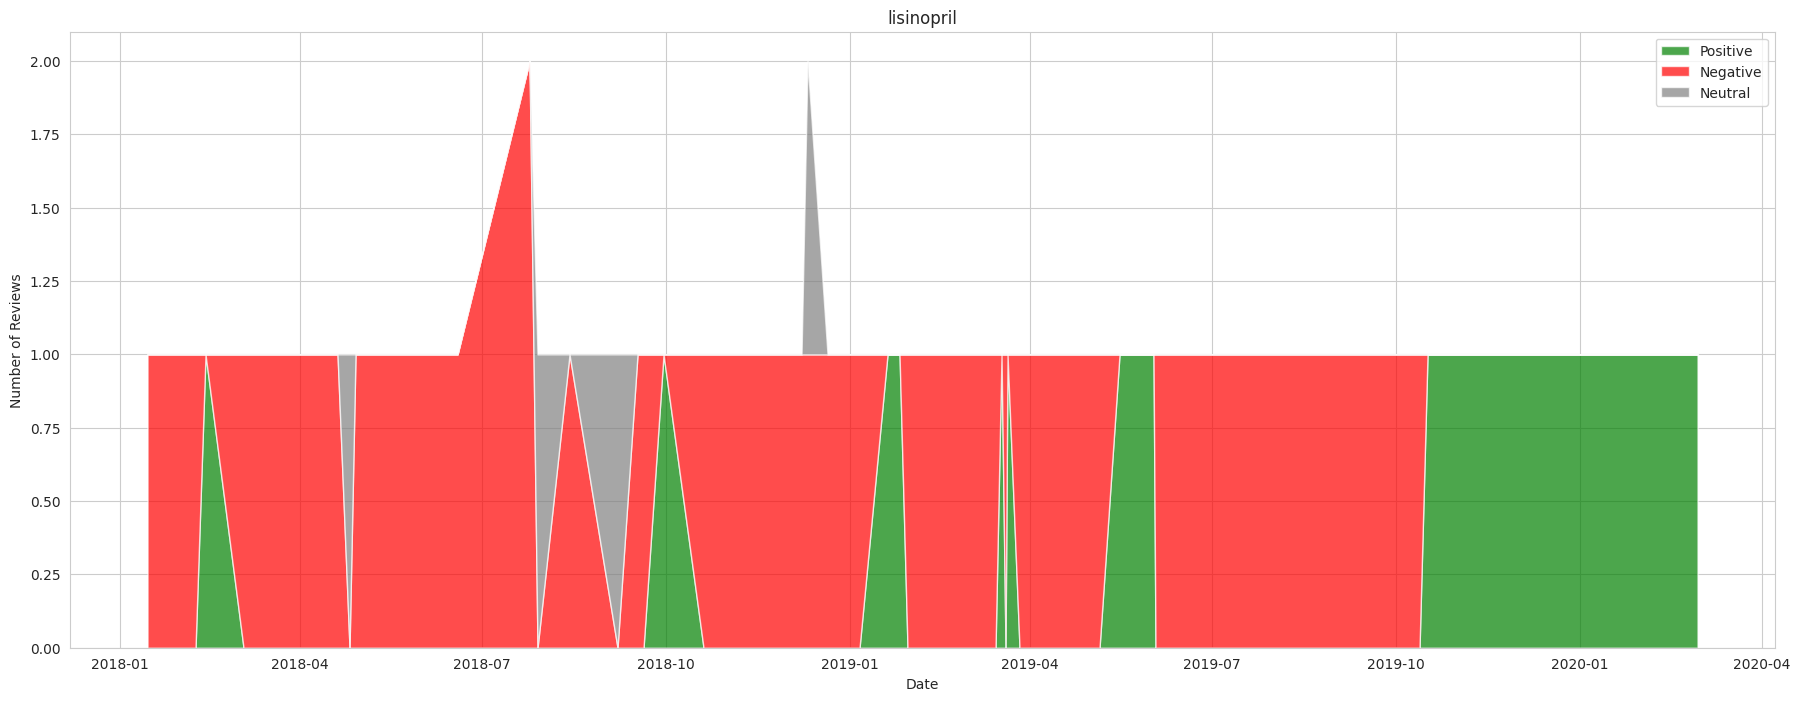

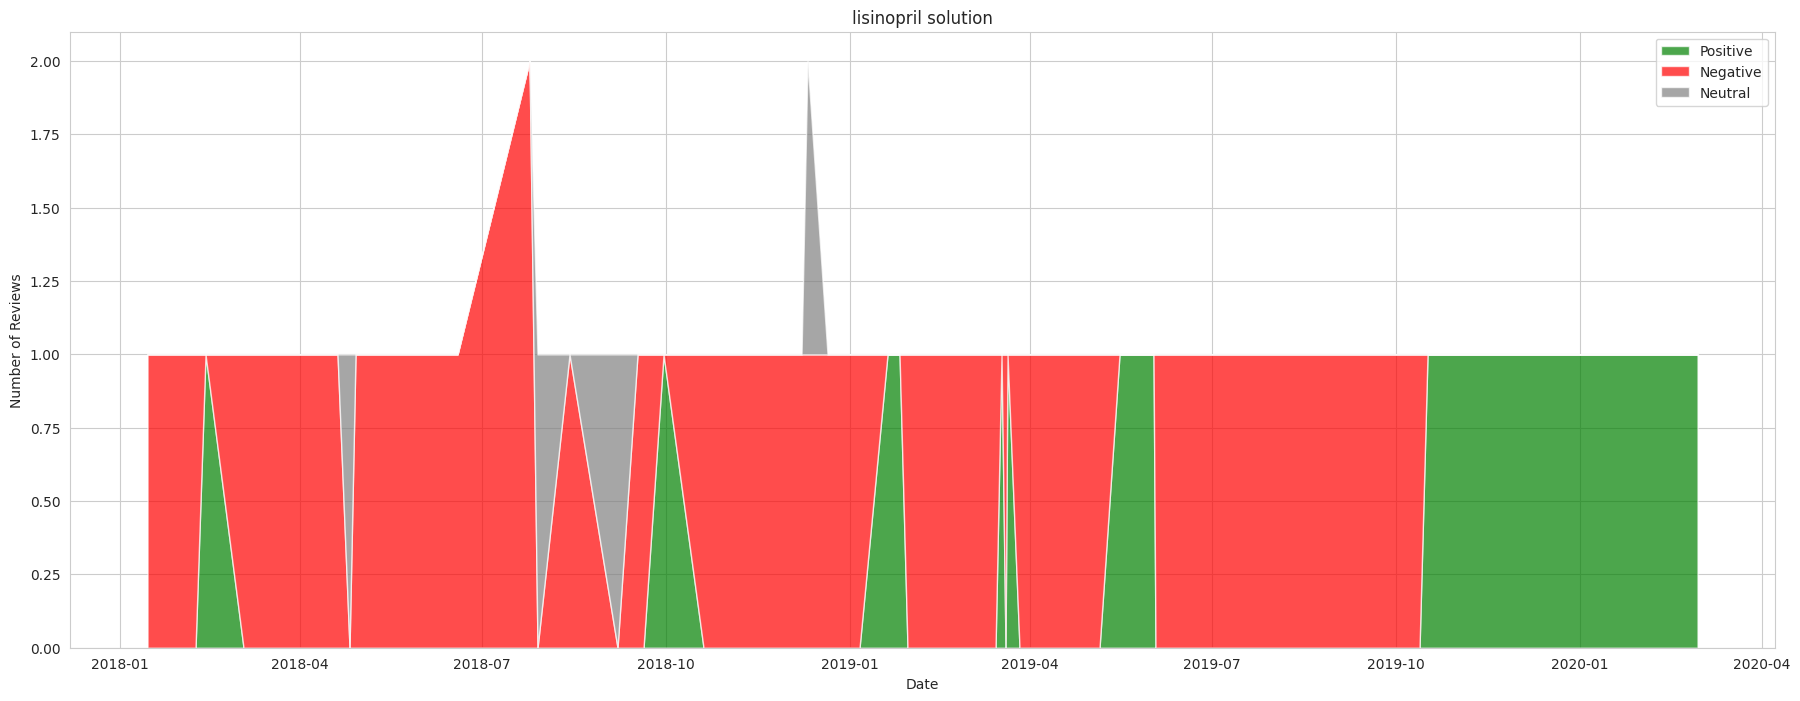

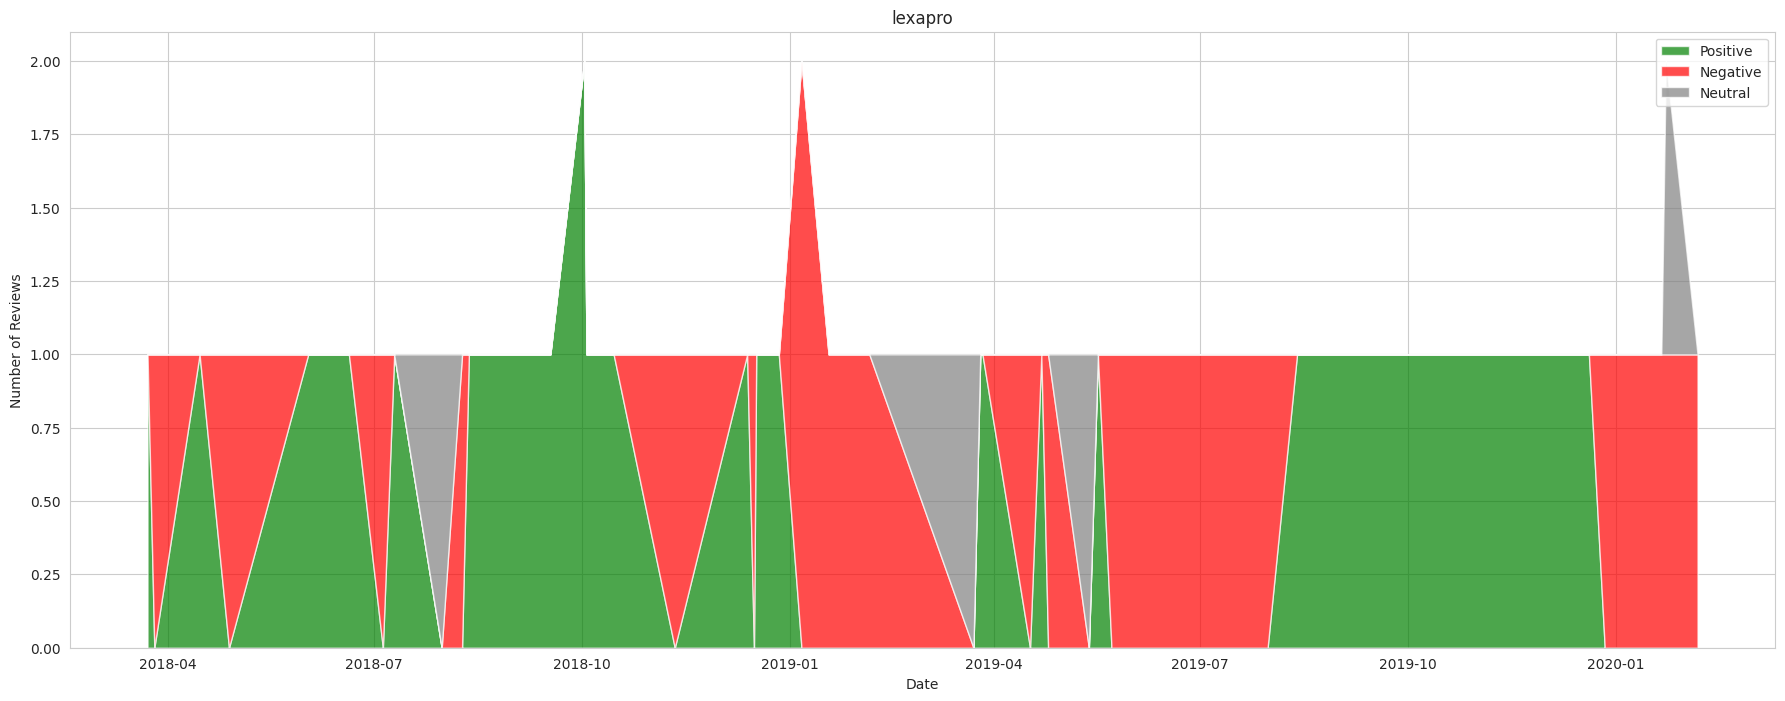

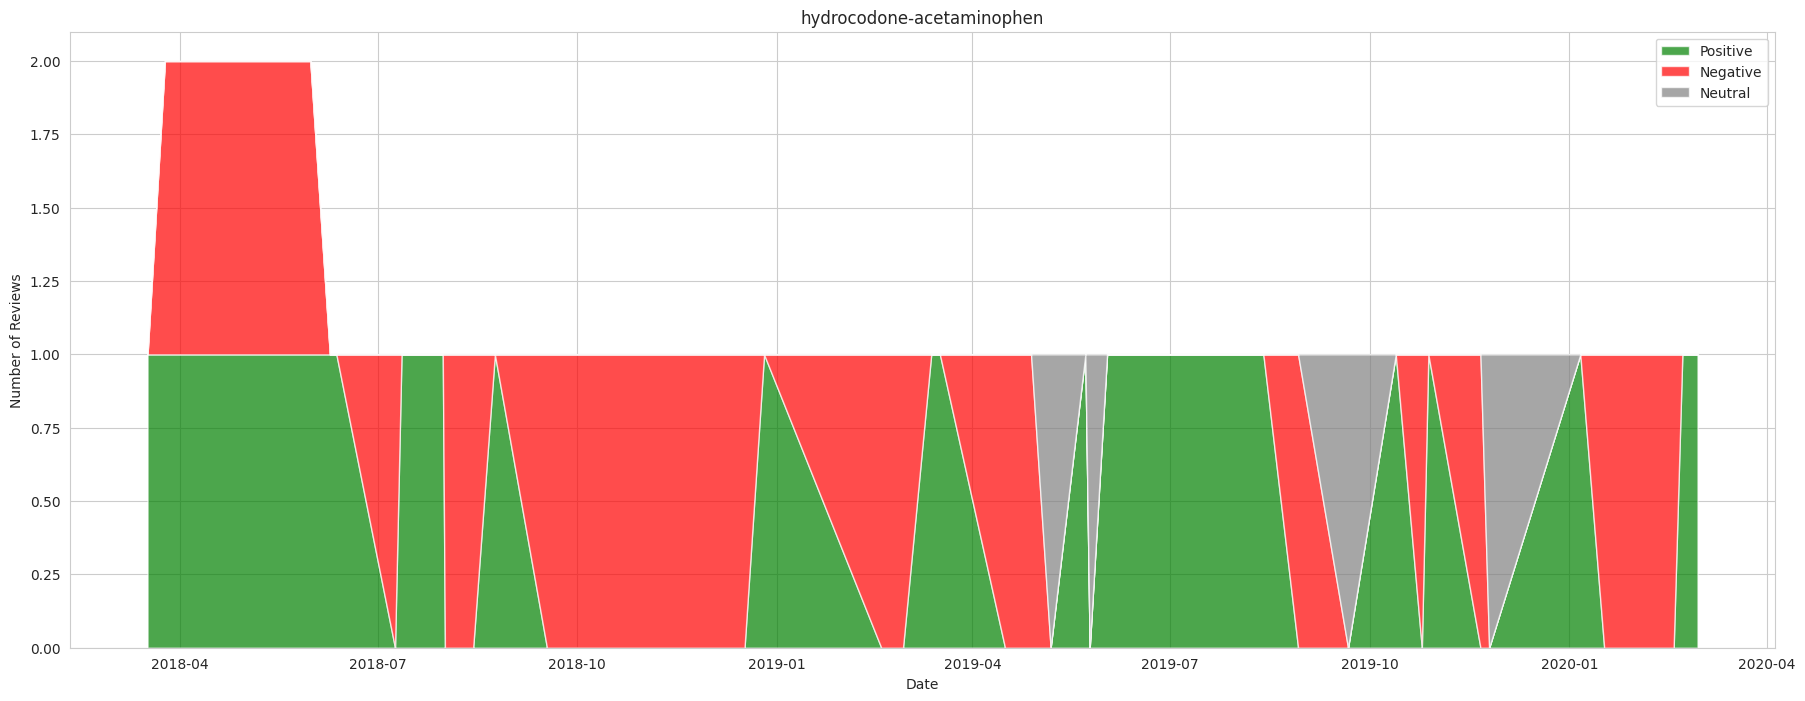

In [ ]:
#Create a stacked area chart for each drug, highlighting the overall sentiment
for drug in top_drugs:
    df_drug = pivot.loc[drug]
    plt.figure(figsize=(22, 8))
    plt.stackplot(df_drug.index, df_drug['Positive'], df_drug['Negative'], df_drug['Neutral'], 
                  labels=['Positive', 'Negative', 'Neutral'], colors=['green', 'red', 'gray'], alpha=0.7)
    plt.title(drug)
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    plt.legend()
    plt.show()


###Based on a patients feedback, Are we able to predict the likelihood that they will stop using a healthcare product?